**TMDB** - The Movie Database (имеет открытый API для разработчиков).

**GroupLens** - исследовательская лаборатория университета Миннесоты; специализируется на рекомендательных системах. Известны созданием датасетов MovieLens для исследований в области рекомендаций фильмов.

**IMDb** - это Internet Movie Database, крупнейшая в мире онлайн база данных о фильмах, сериалах, актёрах и кинематографистах. Сайт позволяет оценивать контент, читать рецензии и находить информацию о релизах. Принадлежит Amazon.

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('movies_metadata.csv')

/tmp/ipython-input-2089594497.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [ ]:
df.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [ ]:
df['belongs_to_collection'].count() # кол-во заполненных значений столбца с коллекциями

np.int64(4494)

In [ ]:
df['belongs_to_collection'].isna().sum() # кол-во NaN в столбце с коллекциями

np.int64(40972)

In [ ]:
df['belongs_to_collection'].nunique() # кол-во уникальных коллекций

1698

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**УДАЛИТЬ**

**belongs_to_collection**

Вообще принадлежность к коллекции могла бы быть полезной. Логично предложить человеку 2-ую часть Истории игрушек, если ему понравилась 1-ая. Но большая часть данного столбца - пропуски. Также есть вариант просто сделать категориальный признак - является ли фильм частью франшизы или нет. Ну или просто удаляем столбец.

Удаляем **adult**, так как таких фильмов всего 9.

Удаляем **homepage**, так как а) много пропусков и б) не несёт смысловой нагрузки для кластеризации.

**id, imdb_id** удаляем, так как идентификаторы в кластеризации только мешают.

**poster_path** нам тоже не даст полезной информации, если мы никак не работаем с CV (хотя и тут сомнительно предлагать пользователю фильмы по похожести постеров).

**video** удаляем так как почти все записи - полноценные фильмы, соответственно вариативности этот столбец почти не даёт.

**original_title** - так как достаточно названия на английском для извлечения смысла.


In [ ]:
df = df.drop(['belongs_to_collection','adult','homepage', 'id', 'imdb_id', 'poster_path', 'video', 'original_title'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   original_language     45455 non-null  object 
 3   overview              44512 non-null  object 
 4   popularity            45461 non-null  object 
 5   production_companies  45463 non-null  object 
 6   production_countries  45463 non-null  object 
 7   release_date          45379 non-null  object 
 8   revenue               45460 non-null  float64
 9   runtime               45203 non-null  float64
 10  spoken_languages      45460 non-null  object 
 11  status                45379 non-null  object 
 12  tagline               20412 non-null  object 
 13  title                 45460 non-null  object 
 14  vote_average          45460 non-null  float64
 15  vote_count         

In [ ]:
df.head(10)

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,An ugly duckling having undergone a remarkable...,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,5.4,45.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,International action superstar Jean Claude Van...,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,5.5,174.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0


In [ ]:
# Приводим budget и popularity к числовому виду
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

In [ ]:
# Извлекаем год из release_date, так как вряд ли кому-то важна конкретная дата выхода, года достаточно
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

In [ ]:
# Парсинг genres
def parse_genres(x):
    try:
        genres_list = ast.literal_eval(x)  # строка → список словарей
        return [d["name"] for d in genres_list if "name" in d]
    except:
        return []

df["genres_parsed"] = df["genres"].apply(parse_genres)

In [ ]:
# MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df["genres_parsed"])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)

# Объединяем с основным датасетом
df = pd.concat([df, genres_df], axis=1)

In [ ]:
# --- Определяем признаки ---
numeric_features = ["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count", "release_year"]
categorical_features = ["original_language", "status"]
text_features = ["overview", "tagline", "title"]
genre_features = list(mlb.classes_)  # все жанры как отдельные признаки

In [ ]:
# Предобработка данных в столбцах по категориям
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

text_transformers = [
    ("overview_tfidf", TfidfVectorizer(max_features=5000), "overview"),
    ("tagline_tfidf", TfidfVectorizer(max_features=2000), "tagline"),
    ("title_tfidf", TfidfVectorizer(max_features=2000), "title")
]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("genres", "passthrough", genre_features),  # жанры уже закодированы
    ] + [(name, tfidf, col) for name, tfidf, col in text_transformers]
)

In [ ]:
# Заполняем пропуски в текстовых колонках
for col in ["overview", "tagline", "title"]:
    df[col] = df[col].fillna("")

In [ ]:
# Применяем трансформации
X = preprocessor.fit_transform(df)

In [ ]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce").fillna(0)
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce").fillna(0)
df["runtime"] = df["runtime"].fillna(df["runtime"].median())
df["release_year"] = df["release_year"].fillna(df["release_year"].median())
df["revenue"] = df["revenue"].fillna(0)
df["vote_average"] = df["vote_average"].fillna(df["vote_average"].median())
df["vote_count"] = df["vote_count"].fillna(0)

In [ ]:
df["original_language"] = df["original_language"].fillna("unknown")
df["status"] = df["status"].fillna("unknown")

In [ ]:
print(df.isna().sum())   # убедиться, что нет NaN

budget                                   0
genres                                   0
original_language                        0
overview                                 0
popularity                               0
production_companies                     0
production_countries                     0
revenue                                  0
runtime                                  0
spoken_languages                         0
status                                   0
tagline                                  0
title                                    0
vote_average                             0
vote_count                               0
release_year                             0
genres_parsed                            0
Action                                   0
Adventure                                0
Animation                                0
Aniplex                                  0
BROSTA TV                                0
Carousel Productions                     0
Comedy     

In [ ]:
for col in ["production_companies", "production_countries", "spoken_languages"]:
    df[col] = df[col].fillna("[]")   # пустой список в строковом виде

In [ ]:
df["release_year"] = df["release_year"].fillna(df["release_year"].median())

In [ ]:
df = df.drop('release_date', axis=1)

In [ ]:
# Кластеризация
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(X)

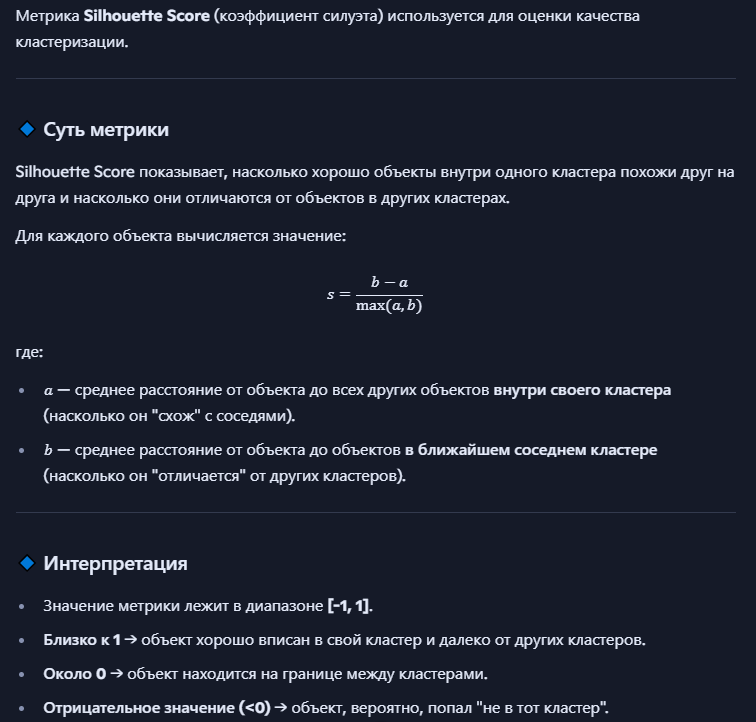

In [ ]:
# Оценка качества
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.12686829636524033


In [ ]:
# Добавляем кластеры
df["cluster"] = labels
print(df[["title", "genres_parsed", "cluster"]].head(20))

                             title                       genres_parsed  \
0                        Toy Story         [Animation, Comedy, Family]   
1                          Jumanji        [Adventure, Fantasy, Family]   
2                 Grumpier Old Men                   [Romance, Comedy]   
3                Waiting to Exhale            [Comedy, Drama, Romance]   
4      Father of the Bride Part II                            [Comedy]   
5                             Heat    [Action, Crime, Drama, Thriller]   
6                          Sabrina                   [Comedy, Romance]   
7                     Tom and Huck  [Action, Adventure, Drama, Family]   
8                     Sudden Death       [Action, Adventure, Thriller]   
9                        GoldenEye       [Adventure, Action, Thriller]   
10          The American President            [Comedy, Drama, Romance]   
11     Dracula: Dead and Loving It                    [Comedy, Horror]   
12                           Balto    